In [1]:
import math as math
from math import sin, cos, log
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import matplotlib as mpl
from scipy.integrate import tplquad
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.linalg as la
from scipy.special import erf,airy
from numpy import exp, sqrt, pi
from matplotlib import colors

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['text.usetex'] = True #in order to use the actual tex, not the in-built matplotlib version
plt.rc('font', family='serif')

In [4]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# Sketch of the wavefunctions and potential barrier

In [5]:
def edge(x,a,d):
    return 1/(1+exp((a-x)/d))

edgev=np.vectorize(edge)

In [6]:
def psiin(x,a,d,h):
    return h*exp(-(x-a)**2/d)

psiinv=np.vectorize(psiin)

In [7]:
def psiN(x,a1,a2,d,h1,h2):
    return h1*exp(-(x-a1)**2/d)+h2*exp(-(x-a2)**2/d)

psiNv=np.vectorize(psiN)

In [8]:
x=np.arange(-50,70,0.01)

(-55.999499999998804, 75.98949999997494, -0.1, 1.1)

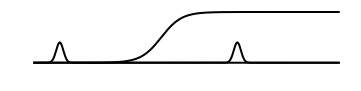

In [9]:
fig = plt.figure()
plt.plot(x,edgev(x,0,4),linewidth=2,color='black')
plt.plot(x,psiinv(x,-40,4,0.4),linewidth=2,color='black')
plt.plot(x,psiinv(x,30,4,0.4),linewidth=2,color='black')
ax = fig.gca()
ax.set_aspect(20)
plt.xticks([0,2],[r'$x_A$',r'$x_1$',])
plt.ylim([-0.1,1.1])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
ax.axis('off')
#plt.xlabel(r'$\theta$ (rad)',fontsize=16)
#plt.ylabel(r'$\langle {\mathbf S}\cdot {\mathbf e} \rangle$, $\langle S_z \rangle$ (units of $S$)',fontsize=16)
#plt.savefig('sketch_gate.svg',bbox_inches='tight')

# The case of a linear ramp

In [10]:
def Wlinear(tau,eps):
    return exp(-2*(eps+v0+a*tau+k)**2-tau**2/2)/pi

Wlinvec=np.vectorize(Wlinear)

In [11]:
def Ramplin(tau):
    return v0+a*tau+k

Ramplinv=np.vectorize(Ramplin)

In [12]:
v0=1;
a=1;
k=0;

In [13]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-10,19,0.02)

In [14]:
t, en = np.meshgrid(tau,eps)

0.0
0.3183098861837907


Text(0, 0.5, '$(E-E_0)\\sigma_t/\\hbar$')

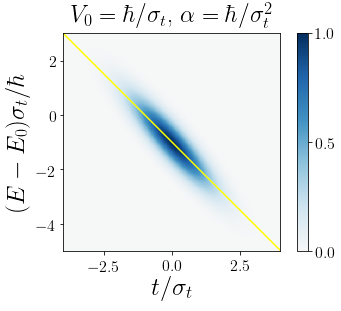

In [15]:
fig = plt.figure()
W=Wlinvec(t,en)
print(np.min(W))
print(np.max(W))
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramplinv(tau),linewidth=1.5,color='yellow')
plt.title(r'$V_0=\hbar/\sigma_t$, $\alpha=\hbar/\sigma_t^2$',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-5,3])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
#plt.savefig('/home/elinal/Wigner_lin_v1a1.pdf',bbox_inches='tight',dpi=300)

In [1030]:
v0=1;
a=2;

In [1031]:
tau=np.arange(-4,4,0.01)
eps=np.arange(-10,3,0.01)
t, en = np.meshgrid(tau,eps)

1.01457400778e-255


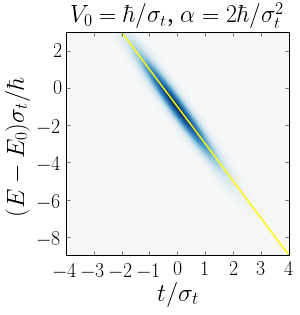

In [1032]:
fig = plt.figure()
W=Wlinvec(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramplinv(tau),linewidth=1.5,color='yellow')
#plt.colorbar(ticks=[0, 0.5,1.0])
ax = fig.gca()
ax.set_aspect(8/12.0)
plt.title(r'$V_0=\hbar/\sigma_t$, $\alpha=2\hbar/\sigma_t^2$',fontsize=24)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-9,3])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_lin_v1a2.pdf',bbox_inches='tight',dpi=300)

In [586]:
v0=5;
a=2;

In [587]:
tau=np.arange(-4,4,0.01)
eps=np.arange(-10,3,0.01)
t, en = np.meshgrid(tau,eps)

3.31232755419e-226


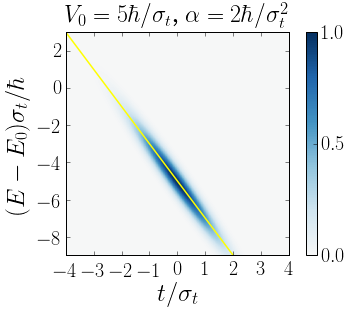

In [588]:
fig = plt.figure()
W=Wlinvec(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramplinv(tau),linewidth=1.5,color='yellow')
plt.colorbar(ticks=[0,0.5,1.0])
plt.title(r'$V_0=5\hbar/\sigma_t$, $\alpha=2\hbar/\sigma_t^2$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/12.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-9,3])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_lin_v10a2.pdf',bbox_inches='tight',dpi=300)

In [20]:
def Wlinear(tau,eps):
    return exp(-2*(eps+beta*tau+v0+a*tau+k)**2-tau**2/2)/pi

Wlinvec=np.vectorize(Wlinear)

In [21]:
beta=-50.0

In [22]:
v0=0;
a=0;

In [23]:
tau=np.arange(-4,4,0.2)
eps=np.arange(-10,10,0.2)
t, en = np.meshgrid(tau,eps)

In [16]:
def GaussCorr(tau,eps):
    return 1.0/(2*pi*sigmae*sigmat*np.sqrt(1.0-r**2))*exp(-((eps/sigmae)**2-2*r*eps*tau/sigmat/sigmae+(tau/sigmat)**2)/(2*(1-r**2)))

GaussCorrVec=np.vectorize(GaussCorr)

In [17]:
sigmat=0.3;
sigmae=1.5;
r=0.8

Text(0, 0.5, '$(E-E_0)\\sigma_t/\\hbar$')

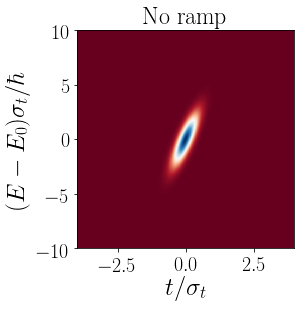

In [19]:
fig = plt.figure()
W=GaussCorrVec(t,en)
plt.pcolor(tau, eps, W, cmap='RdBu',rasterized=True)
#plt.plot(tau,Ramplinv(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=[0, 0.5,1.0])
plt.title('No ramp',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/20.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
#plt.savefig('Wigner_lin_v0a0.pdf',bbox_inches='tight',dpi=300)

# Step-like ramp

In [218]:
def theta(x):
    return 1 * (x > 0)

In [219]:
def Wstep(tau,eps):
    return 1.0/pi*theta(tau-tau0)*exp(-2.0*(eps+v0+k)**2-tau**2/2.0)*np.real(erf((tau-tau0+1j*2.0*(eps+v0+k))/sqrt(2.0)))\
            +1.0/pi*theta(tau0-tau)*exp(-2.0*(eps+k)**2-tau**2/2.0)*np.real(erf((tau0-tau+1j*2.0*(eps+k))/sqrt(2.0)))\
            +1.0/pi*np.real(exp(-1j*v0*(tau-tau0)-2.0*(eps+v0/2.0+k)**2-tau**2/2.0)*(1.0-erf((np.absolute(tau-tau0)+1j*2.0*(eps+v0/2.0+k))/sqrt(2.0))))

Wstepv=np.vectorize(Wstep)

In [220]:
def Wstepapprox(tau,eps):
    return exp(-2*(eps+v0*theta(tau-tau0)+k)**2-tau**2/2)/pi

Wstepapproxv=np.vectorize(Wstepapprox)

In [221]:
def Rampstep(tau):
    return v0*theta(tau-tau0)

Rampstepv=np.vectorize(Rampstep)

In [225]:
v0=5.0;
k=0;
tau0=0;

In [226]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-8,5,0.02)
t, en = np.meshgrid(tau,eps)

-0.151324129949


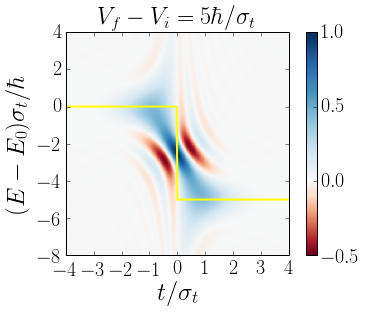

In [227]:
fig = plt.figure()
W=Wstepv(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.5,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Rampstep(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=[-0.5,0,0.5,1])
plt.title(r'$V_f-V_i=5 \hbar/\sigma_t$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/12.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-8,4])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_step_v05.pdf',bbox_inches='tight',dpi=300)

In [1040]:
v0=1.0;
k=0;
tau0=0;

In [1041]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-8,7,0.02)
t, en = np.meshgrid(tau,eps)

-0.0259633518432


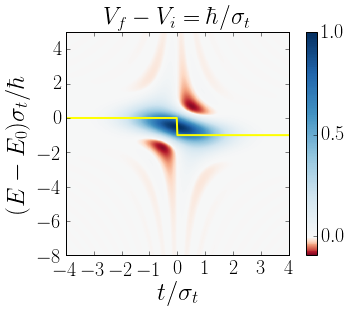

In [1042]:
fig = plt.figure()
W=Wstepv(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.09,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Rampstep(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=[-0.1,0,0.5,1])
plt.title(r'$V_f-V_i=\hbar/\sigma_t$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/13.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-8,5])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_step_v01.pdf',bbox_inches='tight',dpi=300)

In [8]:
v0=0.0;
k=0;
tau0=0;

In [9]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-4,4,0.02)
t, en = np.meshgrid(tau,eps)

1.35229316677e-18


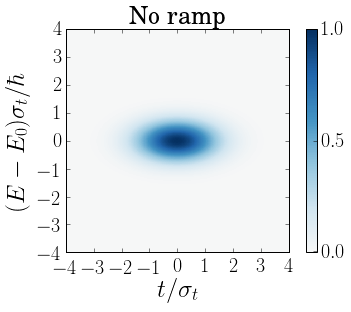

In [534]:
fig = plt.figure()
W=Wstepv(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.00001,vmax=1,norm=MidpointNormalize(midpoint=0.))
#plt.plot(tau,-Rampstep(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=[0, 0.5,1])
plt.title('No ramp',fontsize=24)
ax = fig.gca()
ax.set_aspect(1)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-4,4])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_step_v00.pdf',bbox_inches='tight',dpi=300)

In [535]:
v0=1.0;
k=0;
tau0=0;

In [536]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-4,4,0.02)
t, en = np.meshgrid(tau,eps)

3.32504275275e-26


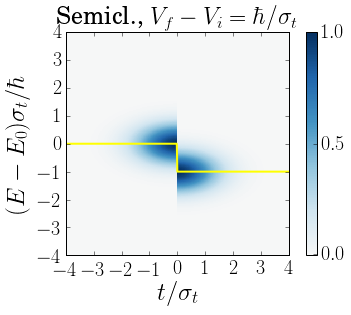

In [537]:
fig = plt.figure()
W=Wstepapproxv(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.00001,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Rampstep(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=[0,0.5,1])
plt.title('Semicl., $V_f-V_i=\hbar/\sigma_t$',fontsize=24)
ax = fig.gca()
ax.set_aspect(1)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-4,4])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_step_approx.pdf',bbox_inches='tight',dpi=300)

# Parabolic ramp

In [1046]:
def Wpar(tau,eps):
    return 1/(np.absolute(w)**(1.0/3.0)*sqrt(pi*2**(1/3)))*exp(-tau**2/2)*exp(1.0/(48.0*w**2)-(eps+k+v0-w*(tau-tau0)**2)/2.0/w)\
            *airy(-2.0**(2.0/3.0)*(eps+k+v0-1.0/16.0/w-w*(tau-tau0)**2)*np.sign(w)/np.absolute(w)**(1.0/3.0))[0]

Wparv=np.vectorize(Wpar)

In [1053]:
def Wpar(tau,eps): #with w->1/2w
    return sqrt(2.0)/(np.absolute(w)**(1.0/3.0)*sqrt(pi))*exp(-tau**2/2)*exp(1.0/(48.0*(0.5*w)**2)-(eps+k+v0-0.5*w*(tau-tau0)**2)/w)\
            *airy(-2.0*(eps+k+v0-1.0/8.0/w-0.5*w*(tau-tau0)**2)/w**(1.0/3.0))[0]

Wparv=np.vectorize(Wpar)

In [172]:
def Wparapprox(tau,eps):
    return exp(-2*(eps+v0-w*(tau-tau0)**2+k)**2-tau**2/2)/pi

Wparapproxv=np.vectorize(Wparapprox)

In [1054]:
def Wparapprox(tau,eps): #with w->1/2w
    return exp(-2*(eps+v0-0.5*w*(tau-tau0)**2+k)**2-tau**2/2)/pi

Wparapproxv=np.vectorize(Wparapprox)

In [1055]:
def Wparapprox2nd(tau,eps): #with w->1/2w
    return exp(-2*(eps+v0-0.5*w*(tau-tau0)**2+k)**2-tau**2/2.0)/pi\
            - 1.0/24.0*(-w)/pi*(16.0*exp(-(tau**2/2.0)-2.0*(eps+k+v0-0.5*(tau-tau0)**2*w)**2)*(eps+k+v0-0.5*(tau-tau0)**2*w)*(3.0-4.0*(eps+k+v0-0.5*(tau-tau0)**2*w)**2))
    
Wparapprox2ndv=np.vectorize(Wparapprox2nd)

In [1056]:
def Ramppar(tau):
    return v0-0.5*w*(tau-tau0)**2
                 
Rampparpv=np.vectorize(Ramppar)

In [1057]:
v0=1.0;
k=0;
tau0=0;
w=0.02;

In [1058]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-3,2,0.02)
t, en = np.meshgrid(tau,eps)

3.55905875291e-12
0.318204053892


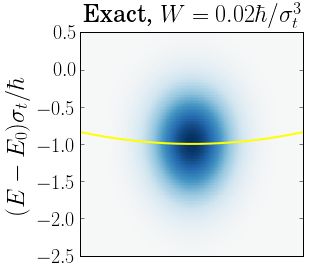

In [867]:
fig = plt.figure()
W=Wparv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=([0,0.5,1]))
plt.title(r'Exact, $W=0.02 \hbar/\sigma^3_t$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/3.0)
plt.xticks([])
#plt.yticks([])
plt.ylim([-2.5,0.5])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w001_ex.pdf',bbox_inches='tight',dpi=300)

1.321683281e-11
0.318309886184


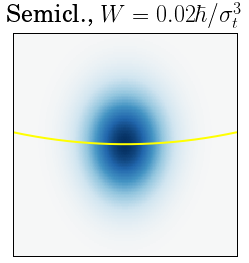

In [868]:
fig = plt.figure()
W=Wparapproxv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=([0,0.5,1]))
plt.title(r'Semicl., $W=0.02 \hbar/\sigma^3_t$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/3.0)
plt.xticks([])
plt.yticks([])
plt.ylim([-2.5,0.5])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#plt.xlabel(r'$t/\sigma_t$',fontsize=25)
#plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w001_appr.pdf',bbox_inches='tight',dpi=300)

-3.3951761426e-09
0.318309886184


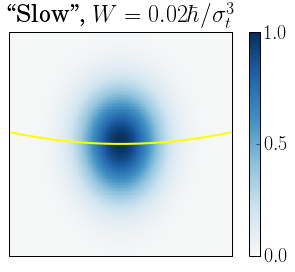

In [1060]:
fig = plt.figure()
W=Wparapprox2ndv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=([0,0.5,1]))
plt.title(r'``Slow", $W=0.02 \hbar/\sigma^3_t$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/3.0)
plt.xticks([])
plt.yticks([])
plt.ylim([-2.5,0.5])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#plt.xlabel(r'$t/\sigma_t$',fontsize=25)
#plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w001_appr_2nd.pdf',bbox_inches='tight',dpi=300)

In [1061]:
v0=1.0;
k=0;
tau0=0;
w=0.2;

In [1062]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-3,2,0.02)
t, en = np.meshgrid(tau,eps)

-0.00238556542057
0.314671263196


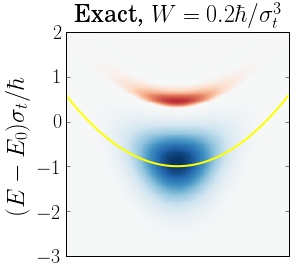

In [872]:
fig = plt.figure()
W=Wparv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.01,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=([0,0.5,1]))
plt.title(r'Exact, $W=0.2\hbar/\sigma_t^3$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/5.0)
plt.xticks([])
#plt.yticks([])
plt.ylim([-3,2])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w01_ex.pdf',bbox_inches='tight',dpi=300)

In [873]:
v0=1.0;
k=0;
tau0=0;
w=0.2;

5.90991590506e-16
0.318309886184


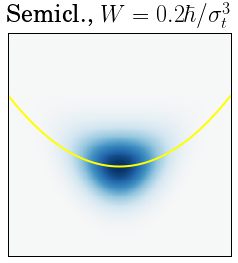

In [874]:
fig = plt.figure()
W=Wparapproxv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=([0,0.5,1]))
plt.title(r'Semicl., $W=0.2\hbar/\sigma_t^3$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/5.0)
plt.xticks([])
plt.yticks([])
plt.ylim([-3,2])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#plt.xlabel(r'$t/\sigma_t$',fontsize=25)
#plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w01_appr.pdf',bbox_inches='tight',dpi=300)

-0.00103598546458
0.324320801568


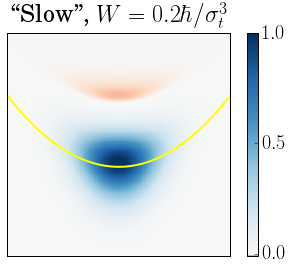

In [1063]:
fig = plt.figure()
W=Wparapprox2ndv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.01,vmax=1,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=([0,0.5,1]))
plt.title(r'``Slow", $W=0.2\hbar/\sigma_t^3$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/5.0)
plt.xticks([])
plt.yticks([])
plt.ylim([-3,2])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#plt.xlabel(r'$t/\sigma_t$',fontsize=25)
#plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w01_appr_2nd.pdf',bbox_inches='tight',dpi=300)

In [1064]:
v0=1.0;
k=0;
tau0=0;
w=2;

In [1065]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-3,13,0.02)
t, en = np.meshgrid(tau,eps)

-0.0958379079783
0.25705237422


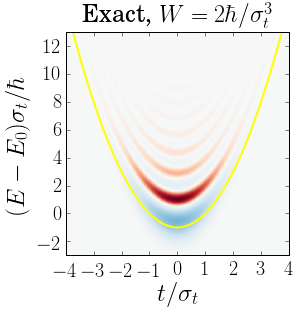

In [881]:
fig = plt.figure()
W=Wparv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.3,vmax=0.55*pi,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=([-0.3,0,0.5,1]))
plt.title(r'Exact, $W=2\hbar/\sigma_t^3$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/16.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-3,13])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w1_ex.pdf',bbox_inches='tight',dpi=300)

In [882]:
v0=1.0;
k=0;
tau0=0;
w=2;

4.03338797131e-286
0.318309886184


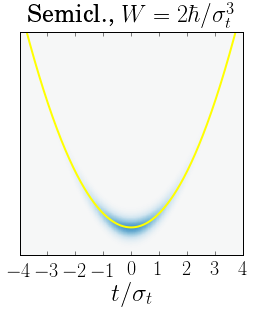

In [884]:
fig = plt.figure()
W=Wparapproxv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.3,vmax=0.55*pi,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=([0,0.5,1]))
plt.title(r'Semicl., $W=2\hbar/\sigma_t^3$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/16.0)
#plt.xticks([])
plt.yticks([])
plt.ylim([-3,13])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
#plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w1_appr.pdf',bbox_inches='tight',dpi=300)

-0.0668947651046
0.546638518746


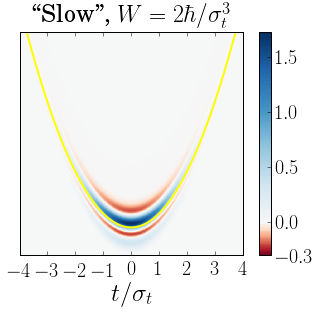

In [1066]:
fig = plt.figure()
W=Wparapprox2ndv(t,en)
print(np.min(W))
print(np.max(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=-0.3,vmax=0.55*pi,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramppar(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=([-0.3,0,0.5,1,1.5]))
plt.title(r'``Slow", $W=2\hbar/\sigma_t^3$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/16.0)
#plt.xticks([0,2])
plt.yticks([])
plt.ylim([-3,13])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$t/\sigma_t$',fontsize=25)
#plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig('Wigner_par_w1_appr_2nd.pdf',bbox_inches='tight',dpi=300)

# Transmitted charge, linear ramp

In [54]:
chExp=np.loadtxt('chargeLinExp.txt')
chTh=np.loadtxt('chargeLinThe.txt')

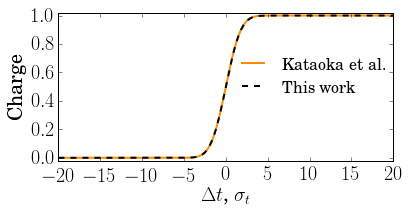

In [55]:
fig = plt.figure()
plt.plot(x,chExp,linewidth=2,color='darkorange',label=r'Kataoka et al.')
plt.plot(x,chTh,linewidth=2,color='black',label=r'This work',linestyle='--')
#plt.title(r'Transmitted charge',fontsize=24)
ax = fig.gca()
ax.legend(bbox_to_anchor=(1.02, 0.8),frameon=False,fontsize=16)
ax.set_aspect(17)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-0.02,1.02])
plt.xlim([-20,20])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$\Delta t$, $\sigma_t$',fontsize=20)
plt.ylabel(r'Charge',fontsize=20)
#plt.savefig('charge_lin.pdf',bbox_inches='tight',dpi=300)

# Sketch for the Wigner function

In [29]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-4,4,0.02)
t, en = np.meshgrid(tau,eps)

1.35229315947e-18


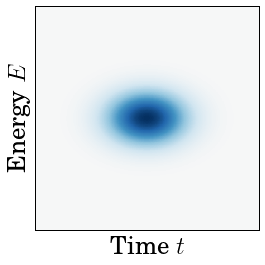

In [30]:
fig = plt.figure()
W=Wlinvec(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
#plt.plot(tau,Ramplinv(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=[0, 0.5,1.0])
ax = fig.gca()
ax.set_aspect(8/6.0)
plt.xticks([])
plt.yticks([])
plt.ylim([-3,3])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'Time $t$',fontsize=25)
plt.ylabel(r'Energy $E$',fontsize=25)
plt.savefig('Wigner_blob.png',bbox_inches='tight',dpi=300)

0.0


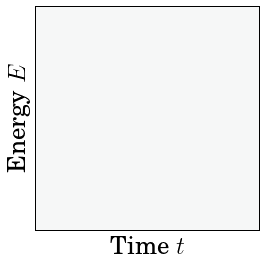

In [27]:
fig = plt.figure()
W=Wlinvec(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
#plt.plot(tau,Ramplinv(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=[0, 0.5,1.0])
ax = fig.gca()
ax.set_aspect(8/6.0)
plt.xticks([])
plt.yticks([])
plt.ylim([-300,300])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'Time $t$',fontsize=25)
plt.ylabel(r'Energy $E$',fontsize=25)
plt.savefig('Wigner_point.png',bbox_inches='tight',dpi=300)

In [49]:
v0=0;
a=0;

In [50]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-10,19,0.02)
t, en = np.meshgrid(tau,eps)

1.34170937113e-317


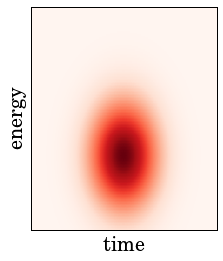

In [51]:
fig = plt.figure()
W=Wlinvec(t,en)
print(np.min(W))
plt.pcolor(tau, eps, W, cmap='Reds',rasterized=True,vmin=0,vmax=1/pi)
#plt.plot(tau,Ramplinv(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=[0, 0.1,0.2,0.3])
#plt.title('Incoming wave',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/2.5)
plt.xticks([])
plt.yticks([])
plt.ylim([-1,2])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'time',fontsize=20)
plt.ylabel(r'energy',fontsize=20)
plt.savefig('W_sketch.pdf',bbox_inches='tight',dpi=300)

In [52]:
def step(x,a):
    return 1 * (x > a)

In [53]:
def cut(tau,eps):
    return Wlinear(tau,eps)*step(eps,0)

0.0


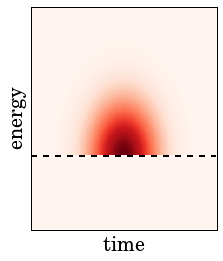

In [54]:
fig = plt.figure()
W=cut(t,en)
print(np.min(W))
plt.pcolor(tau, eps, W, cmap='Reds',rasterized=True,vmin=0,vmax=1/pi)
plt.plot(tau, 0*tau, linewidth=2,color='black',linestyle='--')
#plt.plot(tau,Ramplinv(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=[0, 0.1,0.2,0.3])
#plt.title('Incoming wave',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/2.5)
plt.xticks([])
plt.yticks([])
plt.ylim([-1,2])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'time',fontsize=20)
plt.ylabel(r'energy',fontsize=20)
plt.savefig('W_sketch_cut.pdf',bbox_inches='tight',dpi=300)

In [43]:
def WlinvecCut(tau,eps):
    return Wlinvec(tau,eps)*step(eps,-v0)

In [42]:
v0=-0.7;
a=-0.5;
k=0;

In [44]:
tau=np.arange(-4,4,0.02)
eps=np.arange(-10,19,0.02)

In [45]:
t, en = np.meshgrid(tau,eps)

0.0


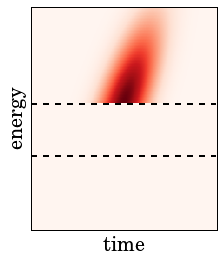

In [48]:
fig = plt.figure()
W=WlinvecCut(t,en)
print(np.min(W))
plt.pcolor(tau, eps, W, cmap='Reds',rasterized=True,vmin=0,vmax=1/pi)
plt.plot(tau, 0*tau, linewidth=2,color='black',linestyle='--')
plt.plot(tau, 0*tau-v0, linewidth=2,color='black',linestyle='--')
#plt.plot(tau,Ramplinv(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=[0, 0.1,0.2,0.3])
#plt.title('Incoming wave',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/2.5)
plt.xticks([])
plt.yticks([])
plt.ylim([-1,2])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'time',fontsize=20)
plt.ylabel(r'energy',fontsize=20)
plt.savefig('W_sketch_V.pdf',bbox_inches='tight',dpi=300)

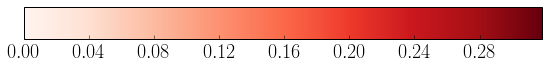

In [70]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cmap = mpl.cm.Reds
norm = mpl.colors.Normalize(vmin=0, vmax=1/pi)
#plt.colorbar(ticks=[0, 0.1,0.2,0.3],cmap='Reds',rasterized=True,vmin=0,vmax=1/pi)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('Some Units')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


# The third example illustrates the use of custom length colorbar
# extensions, used on a colorbar with discrete intervals.
cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])
cmap.set_over((1., 0., 0.))
cmap.set_under((0., 0., 1.))

bounds = [-1., -.5, 0., .5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


plt.savefig('W_sketch_colorbar.pdf',bbox_inches='tight',dpi=300)

# Transmitted charge -- linear ramp

In [117]:
from scipy.integrate import simps, trapz

###### Transmission coefficient -- step function in energy:

In [463]:
def T(eps):
    return 1 * (eps>eps0)

In [464]:
def Wlinear(tau,eps,v0,a):
    return exp(-2*(eps+v0+a*tau+k)**2-tau**2/2)/pi

Wlinvec=np.vectorize(Wlinear)

In [465]:
def IntLin(tau,eps,v0,a): #integrand of the expression for the charge
    return Wlinear(tau,eps,v0,a)*T(eps)

IntLinvec=np.vectorize(IntLin)

In [68]:
v0=1;
a=1;
k=0; #wave packet average energy
eps0=0; #cut of the QPC in energy

In [69]:
tau=np.arange(-10,10,0.1)
eps=np.arange(-10,19,0.1)

In [70]:
t, en = np.meshgrid(tau,eps)

In [71]:
tau=np.arange(-50,50,0.1)
epscut=np.arange(0,70,0.1)

In [861]:
t, encut = np.meshgrid(tau,epscut)

0.0
0.195982504626


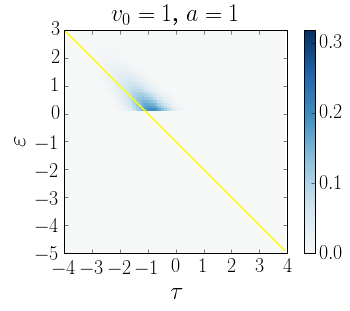

In [208]:
fig = plt.figure()
Int=IntLinvec(t,en)
print(np.min(Int))
print(np.max(Int))
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(tau, eps, Int, cmap='RdBu',rasterized=True,vmin=0,vmax=1/pi,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Ramplinv(tau),linewidth=1.5,color='yellow')
plt.title(r'$v_0=1$, $a=1$',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.1,0.2,0.3])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-5,3])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\tau$',fontsize=25)
plt.ylabel(r'$\varepsilon$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

In [466]:
def charge(v0,a):
    Int=IntLinvec(t,encut,v0,a)
    return simps(simps(Int,t),epscut)

chargevec=np.vectorize(charge)

In [856]:
%%time
charge(1,10)

CPU times: user 268 ms, sys: 0 ns, total: 268 ms
Wall time: 263 ms


0.42166292555288681

In [862]:
%%time
charge(1,10)

CPU times: user 1.07 s, sys: 8.14 ms, total: 1.08 s
Wall time: 1.06 s


0.45854636826720319

In [791]:
vsample=np.arange(-10,10,1)

In [284]:
chargevec(vsample,1)

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   9.99999952e-01,   9.99995465e-01,
         9.99802244e-01,   9.95950718e-01,   9.60184429e-01,
         8.04485083e-01,   4.85120429e-01,   1.75579480e-01,
         3.38226437e-02,   3.24083552e-03,   1.48817762e-04,
         3.20612539e-06,   3.19953492e-08,   1.46707990e-10,
         3.07424884e-13,   2.93304933e-16])

In [16]:
v0vec=np.arange(-10,10,0.1)
avec=np.arange(-10,10,0.1)

In [17]:
v0v, av = np.meshgrid(v0vec,avec)

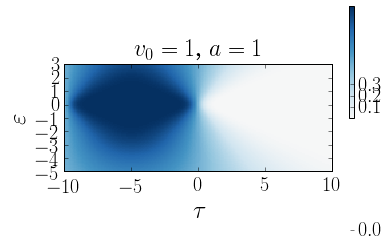

In [239]:
fig = plt.figure()
#ch=chargevec(v0v,av)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, avec, ch, cmap='RdBu',rasterized=True,norm=MidpointNormalize(midpoint=0.))
plt.title(r'$v_0=1$, $a=1$',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.1,0.2,0.3])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-0,10])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$v_0$',fontsize=25)
plt.ylabel(r'$a$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

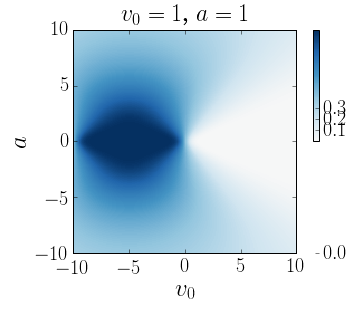

In [241]:
fig = plt.figure()
#ch=chargevec(v0v,av)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, avec, ch, cmap='RdBu',rasterized=True,norm=MidpointNormalize(midpoint=0.))
plt.title(r'$v_0=1$, $a=1$',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.1,0.2,0.3])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$v_0$',fontsize=25)
plt.ylabel(r'$a$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

In [242]:
np.savetxt('charge_2d_lin.txt', ch)

CPU times: user 8h 30s, sys: 3min 52s, total: 8h 4min 22s
Wall time: 8h 9s


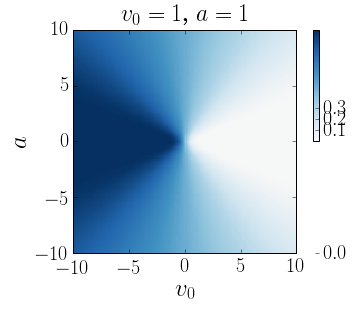

In [265]:
%%time
fig = plt.figure()
ch50=chargevec(v0v,av)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, avec, ch50, cmap='RdBu',rasterized=True,norm=MidpointNormalize(midpoint=0.))
plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.1,0.2,0.3])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$v_0$',fontsize=25)
plt.ylabel(r'$a$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

In [266]:
np.savetxt('charge_2d_lin_N50.txt', ch50)

In [14]:
ch50=np.loadtxt('charge_2d_lin_N50.txt')

CPU times: user 671 ms, sys: 0 ns, total: 671 ms
Wall time: 669 ms


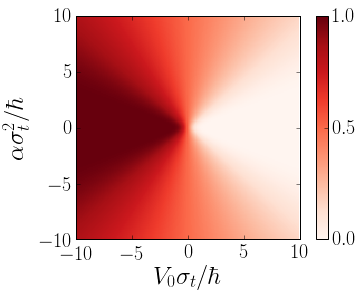

In [19]:
%%time
fig = plt.figure()
#ch50=chargevec(v0v,av)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, avec, ch50, cmap='Reds',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$\alpha \sigma_t^2/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

### Learning how to use sinogram

FBP rms reconstruction error: 0.0214


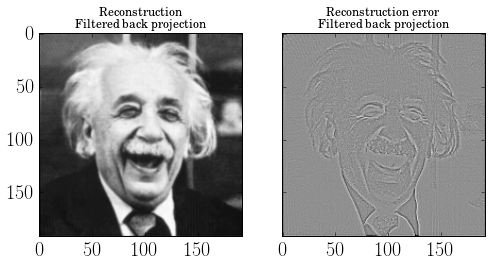

In [63]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, circle=False)
error = reconstruction_fbp - image
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error**2)))

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

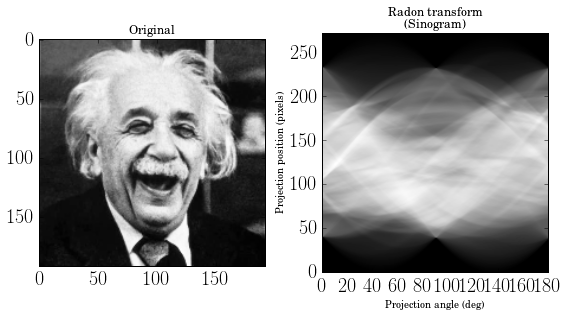

In [62]:
from __future__ import print_function, division


from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale

image = imread(data_dir + "/einstein-laugh.jpg", as_grey=True)
image = rescale(image, scale=0.4, mode='reflect')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=False)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

### Original vs recovered image 

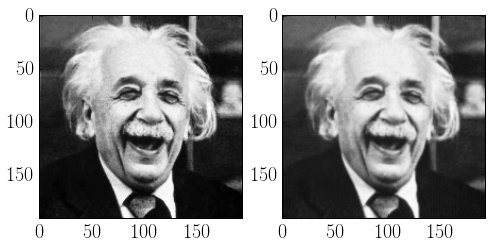

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
ax1.imshow(image, cmap=plt.cm.Greys_r)
ax2.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
plt.show()

2.05953974276e-26


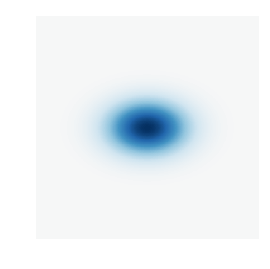

In [160]:
fig = plt.figure()
W=Wlinvec(t,en)
print(np.min(W))
plt.pcolor(tau, eps, pi*W, cmap='RdBu',rasterized=True,vmin=0,vmax=1,norm=MidpointNormalize(midpoint=0.))
#plt.plot(tau,Ramplinv(tau),linewidth=2,color='yellow')
#plt.colorbar(ticks=[0, 0.5,1.0])
#plt.title('No ramp',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/6.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-3,3])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
ax.axis('off')
#plt.xlabel(r'$t/\sigma_t$',fontsize=25)
#plt.ylabel(r'$(E-E_0)\sigma_t/\hbar$',fontsize=25)
plt.savefig(data_dir + "/blob.png",bbox_inches='tight',dpi=300)

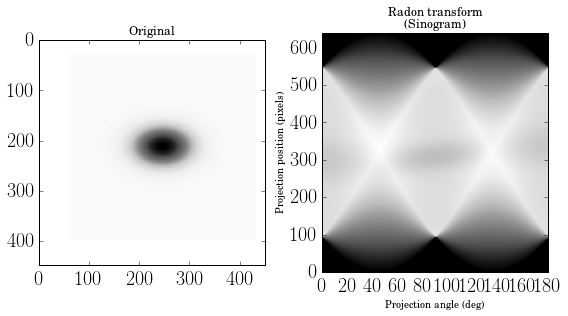

In [161]:
from __future__ import print_function, division


from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale

image = imread(data_dir + "/blob.png", as_grey=True)
image = rescale(image, scale=0.4, mode='reflect')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=False)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

## Charge as a function of theta and V

In [866]:
a0=10;

In [867]:
def Gauss(tau,eps):
    return 1.0/(2*pi*sigmae*sigmat*np.sqrt(1.0-r**2))*exp(-((eps/sigmae)**2-2*r*eps*tau/sigmat/sigmae+(tau/sigmat)**2)/(2*(1-r**2)))

Gaussvec=np.vectorize(Gauss)

In [868]:
def rad(v0,a):
    Int=Gaussvec(tau,v0+a*tau)
    return simps(Int,tau)

In [869]:
def radth(theta,v0):
    return rad(v0,a0*np.tan(theta))

radvec = np.vectorize(radth)

In [870]:
tau=np.arange(-10,10,0.1)
eps=np.arange(-20,20,0.1)

In [871]:
t, en = np.meshgrid(tau,epscut)

In [872]:
v0vec=np.arange(-10,10,0.1)
thetavec=np.arange(-pi/2,pi/2,0.1)

In [873]:
thetav,v0v = np.meshgrid(thetavec,v0vec)

CPU times: user 3.72 s, sys: 16 ms, total: 3.73 s
Wall time: 3.72 s


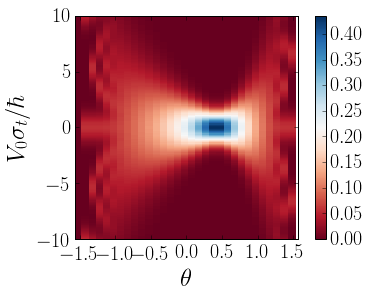

In [874]:
%%time
fig = plt.figure()
radtr=radvec(thetav,v0v)
#np.savetxt('charge_2d_lin_N50_theta_step0025.txt', chth)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, radtr, cmap='RdBu',rasterized=True)
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

In [691]:
beta=-10.0

In [692]:
def Wlinear(tau,eps,v0,a): #eps has been rescaled!
    return exp(-2*(eps+beta*tau+v0+a*tau+k)**2-tau**2/2)/pi

Wlinvec=np.vectorize(Wlinear)

In [693]:
def IntLin(tau,eps,v0,a): #integrand of the expression for the charge
    return Wlinear(tau,eps,v0,a)*T(eps)

IntLinvec=np.vectorize(IntLin)

In [694]:
def charge(v0,a):
    Int=IntLinvec(t,encut,v0,a)
    return simps(simps(Int,t),epscut)

chargevec=np.vectorize(charge)

In [695]:
a0=1;

In [696]:
def chargeth(theta,v0):
    return charge(v0,a0*np.tan(theta))

chargethvec=np.vectorize(chargeth)

In [882]:
tau=np.arange(-10,10,0.1)
epscut=np.arange(0,50,0.1)

In [883]:
t, encut = np.meshgrid(tau,epscut)

In [884]:
v0vec=np.arange(-10,10,0.025)
thetavec=np.arange(-pi/2,pi/2,0.025)

In [885]:
thetav,v0v = np.meshgrid(thetavec,v0vec)

CPU times: user 1min 41s, sys: 666 ms, total: 1min 41s
Wall time: 1min 41s


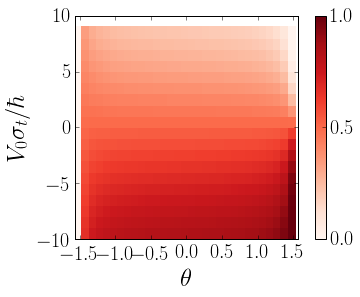

In [701]:
%%time
fig = plt.figure()
chth=chargethvec(thetav,v0v)
#np.savetxt('charge_2d_lin_N50_theta_step0025.txt', chth)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chth, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 16min 31s, sys: 6.86 s, total: 16min 38s
Wall time: 16min 35s


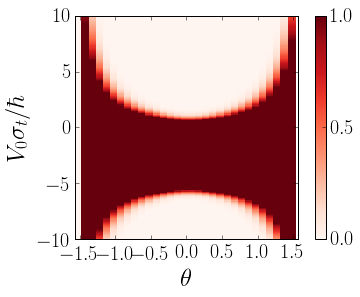

In [510]:
%%time
fig = plt.figure()
chth=chargethvec(thetav,v0v)
#np.savetxt('charge_2d_lin_N50_theta_step0025.txt', chth)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chth, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 165 ms, sys: 8.02 ms, total: 173 ms
Wall time: 172 ms


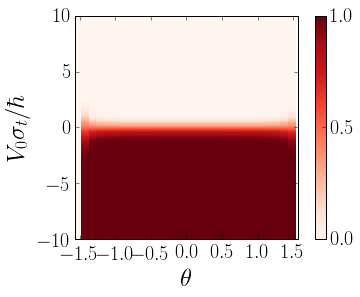

In [476]:
%%time
fig = plt.figure()
#chth=chargethvec(thetav,v0v)
#np.savetxt('charge_2d_lin_N50_theta_step0025.txt', chth)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chth, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 16min 18s, sys: 6.63 s, total: 16min 25s
Wall time: 16min 21s


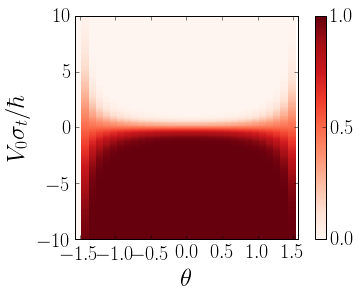

In [485]:
%%time
fig = plt.figure()
chth=chargethvec(thetav,v0v)
#np.savetxt('charge_2d_lin_N50_theta_step0025.txt', chth)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chth, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 162 ms, sys: 4.03 ms, total: 166 ms
Wall time: 165 ms


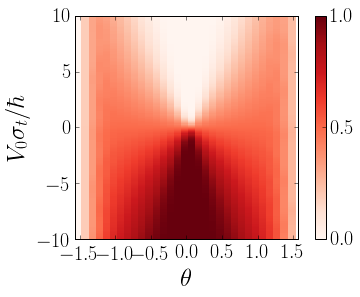

In [478]:
%%time
a0=10;
fig = plt.figure()
#chth=chargethvec(thetav,v0v)
#np.savetxt('charge_2d_lin_N50_theta_step0025.txt', chth)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chth, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 4h 15min 5s, sys: 23.2 s, total: 4h 15min 28s
Wall time: 4h 14min 38s


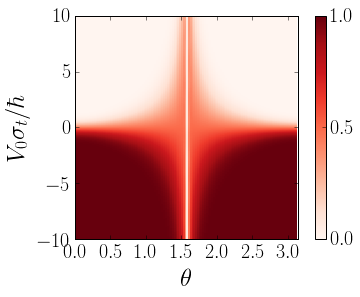

In [190]:
%%time
fig = plt.figure()
chth=chargethvec(thetav,v0v)
#np.savetxt('charge_2d_lin_N50_theta_step0025.txt', chth)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chth, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

In [879]:
chth=np.loadtxt('charge_2d_lin_N50_theta_step0025.txt')

In [704]:
chthgrad=np.zeros((np.shape(chth)[0],np.shape(chth)[1]))
for i in range(0,np.shape(chth)[0]):
    chthgrad[i,:] = np.gradient(chth[i,:])

In [880]:
chthgrad=np.zeros((np.shape(chth)[0],np.shape(chth)[1]))
for i in range(0,np.shape(chth)[1]):
    chthgrad[:,i] = np.gradient(chth[:,i])

In [855]:
chthgrad=np.zeros((np.shape(radtr)[0],np.shape(radtr)[1]))
for i in range(0,np.shape(radtr)[1]):
    chthgrad[:,i] = np.gradient(radtr[:,i])

CPU times: user 192 ms, sys: 4.01 ms, total: 196 ms
Wall time: 194 ms


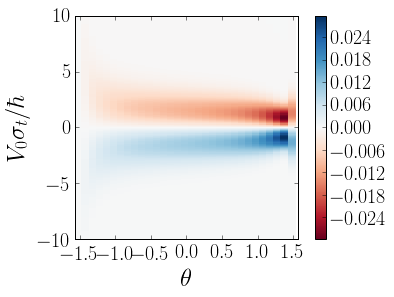

In [856]:
%%time
fig = plt.figure()
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chthgrad, cmap='RdBu',rasterized=True)
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 497 ms, sys: 52.1 ms, total: 549 ms
Wall time: 548 ms


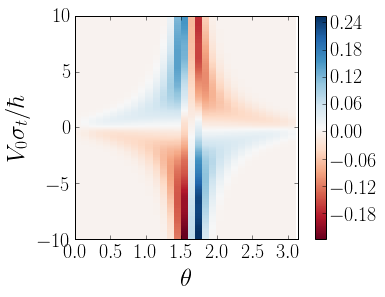

In [164]:
%%time
fig = plt.figure()
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chthgrad, cmap='RdBu',rasterized=True)
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
ax = fig.gca()
ax.set_aspect(pi/20)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 3.29 s, sys: 2.96 s, total: 6.26 s
Wall time: 7.63 s


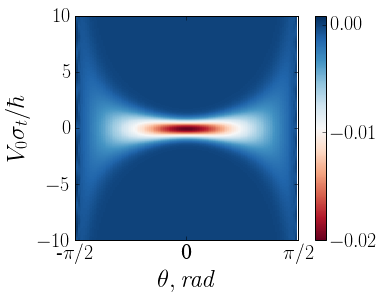

In [909]:
%%time
fig = plt.figure()
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(thetavec, v0vec, chthgrad90, cmap='RdBu',rasterized=True)
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[-0.02,-0.01,0])
ax = fig.gca()
ax.set_aspect(pi/20)
plt.xticks([-pi/2,0,pi/2],[r"-\pi/2","0","\pi/2"])
#plt.yticks([])
plt.ylim([-10,10])
plt.xlim([-pi/2,pi/2])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\theta, \it{ rad}$',fontsize=25)
plt.ylabel(r'$V_0\sigma_t/\hbar$',fontsize=25)
plt.savefig('sinogram.pdf',bbox_inches='tight',dpi=300)

In [903]:
chthgrad90=np.zeros((chthgrad.shape[0],chthgrad.shape[1]))

In [904]:
chthgrad90[:,0:63]=chthgrad[:,63:126]

In [905]:
chthgrad90[:,63:126]=chthgrad[:,0:63]

## Charge as a function of td and a

In [37]:
def chargetd(taud,a):
    return charge(-taud*a,a)
#    return 0 if a==0 else charge(-taud*a,a)

chargetdvec=np.vectorize(chargetd)

In [93]:
tau=np.arange(-10,10,0.1)
epscut=np.arange(0,70,0.1)

In [94]:
t, encut = np.meshgrid(tau,epscut)

In [95]:
taudvec=np.arange(-3,3,0.025)
avec=np.arange(-3,3,0.025)

In [96]:
taudv,av = np.meshgrid(taudvec,avec)

CPU times: user 71.1 ms, sys: 0 ns, total: 71.1 ms
Wall time: 69.8 ms


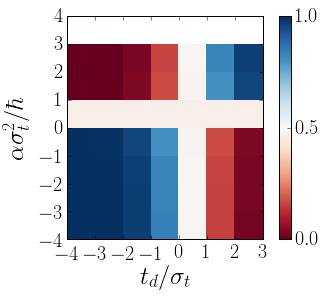

In [867]:
%%time
fig = plt.figure()
#ch50taud=chargetdvec(taudv,av)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(taudvec, avec, ch50taud, cmap='RdBu',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-4,4])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$t_d/\sigma_t$',fontsize=25)
plt.ylabel(r'$\alpha \sigma_t^2/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

In [35]:
ch70taud=np.loadtxt('charge_2d_lin_N50_taud_step0025.txt')

CPU times: user 3h 13min 51s, sys: 1min 4s, total: 3h 14min 56s
Wall time: 3h 14min 34s


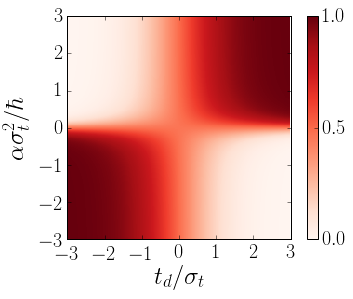

In [1773]:
%%time
fig = plt.figure()
ch70taud=chargetdvec(taudv,av)
np.savetxt('charge_2d_lin_N50_taud_step0025.txt', ch70taud)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(taudvec, avec, ch70taud, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-3,3])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$t_d/\sigma_t$',fontsize=25)
plt.ylabel(r'$\alpha \sigma_t^2/\hbar$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

CPU times: user 3.25 s, sys: 1.78 s, total: 5.04 s
Wall time: 4.28 s


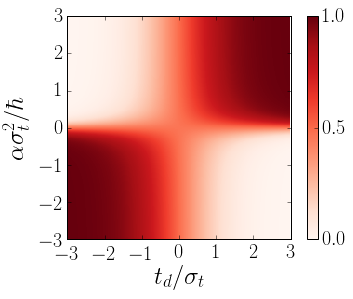

In [42]:
%%time
fig = plt.figure()
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(taudvec, avec, ch70taud, cmap='Reds',rasterized=True,vmin=0,vmax=1.0,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Linear ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-3,3])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$t_d/\sigma_t$',fontsize=25)
plt.ylabel(r'$\alpha \sigma_t^2/\hbar$',fontsize=25)
plt.savefig('charge_2d_lin_td.pdf',bbox_inches='tight',dpi=300)

# Transmitted charge -- step-like ramp

In [242]:
def Wstep(tau,eps,v0,tau0):
    return 1.0/pi*theta(tau-tau0)*exp(-2.0*(eps+v0+k)**2-tau**2/2.0)*np.real(erf((tau-tau0+1j*2.0*(eps+v0+k))/sqrt(2.0)))\
            +1.0/pi*theta(tau0-tau)*exp(-2.0*(eps+k)**2-tau**2/2.0)*np.real(erf((tau0-tau+1j*2.0*(eps+k))/sqrt(2.0)))\
            +1.0/pi*np.real(exp(-1j*v0*(tau-tau0)-2.0*(eps+v0/2.0+k)**2-tau**2/2.0)*(1.0-erf((np.absolute(tau-tau0)+1j*2.0*(eps+v0/2.0+k))/sqrt(2.0))))

Wstepv=np.vectorize(Wstep)

In [243]:
Wstep(1,20,1,1)

nan

In [244]:
def erfapprox(x):
    return 1-exp(-x**2)/sqrt(pi)/x

In [245]:
def Wstep(tau,eps,v0,tau0):
    return (eps<15)*(1.0/pi*theta(tau-tau0)*exp(-2.0*(eps+v0+k)**2-tau**2/2.0)*np.real(erf((tau-tau0+1j*2.0*(eps+v0+k))/sqrt(2.0)))\
            +1.0/pi*theta(tau0-tau)*exp(-2.0*(eps+k)**2-tau**2/2.0)*np.real(erf((tau0-tau+1j*2.0*(eps+k))/sqrt(2.0)))\
            +1.0/pi*np.real(exp(-1j*v0*(tau-tau0)-2.0*(eps+v0/2.0+k)**2-tau**2/2.0)*(1.0-erf((np.absolute(tau-tau0)+1j*2.0*(eps+v0/2.0+k))/sqrt(2.0)))))\
            +(eps>=15)*(1.0/pi*theta(tau-tau0)*exp(-2.0*(eps+v0+k)**2-tau**2/2.0)*np.real(erfapprox((tau-tau0+1j*2.0*(eps+v0+k))/sqrt(2.0)))\
            +1.0/pi*theta(tau0-tau)*exp(-2.0*(eps+k)**2-tau**2/2.0)*np.real(erfapprox((tau0-tau+1j*2.0*(eps+k))/sqrt(2.0)))\
            +1.0/pi*np.real(exp(-1j*v0*(tau-tau0)-2.0*(eps+v0/2.0+k)**2-tau**2/2.0)*(1.0-erfapprox((np.absolute(tau-tau0)+1j*2.0*(eps+v0/2.0+k))/sqrt(2.0)))))

Wstepv=np.vectorize(Wstep)

In [246]:
Wstep(1,1,1,1)

0.0021447551423913092

In [247]:
def IntStep(tau,eps,v0,tau0):
    return Wstep(tau,eps,v0,tau0)*T(eps)

IntStepvec=np.vectorize(IntStep)

In [248]:
v0=5.0;
k=0;
tau0=-1;
eps0=0;

In [249]:
tau=np.arange(-4,4,0.1)
eps=np.arange(-8,5,0.1)
t, en = np.meshgrid(tau,eps)

-0.151324129949


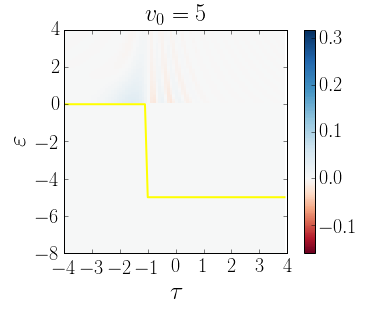

In [579]:
fig = plt.figure()
Int=IntStepvec(t,en,v0,tau0)
print(np.min(W))
plt.pcolor(tau, eps, Int, cmap='RdBu',rasterized=True,vmin=-0.5/pi,vmax=1/pi,norm=MidpointNormalize(midpoint=0.))
plt.plot(tau,-Rampstep(tau),linewidth=2,color='yellow')
plt.colorbar(ticks=[-0.1,0, 0.1,0.2,0.3])
plt.title(r'$v_0=5$',fontsize=24)
ax = fig.gca()
ax.set_aspect(8/12.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-8,4])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
plt.xlabel(r'$\tau$',fontsize=25)
plt.ylabel(r'$\varepsilon$',fontsize=25)
#plt.savefig('Wigner_step_v05.pdf',bbox_inches='tight',dpi=300)

In [740]:
tau=np.arange(-5,5,0.1)
epscut=np.arange(0,17,0.1)

In [741]:
t, encut = np.meshgrid(tau,epscut)

In [742]:
def chargeStep(v0,tau0):
    Int=IntStepvec(t,encut,v0,tau0)
    Int=np.nan_to_num(Int)
    return simps(simps(Int,t),epscut)

chargeStepvec=np.vectorize(chargeStep)

In [743]:
%%time
chargeStep(1,0)

CPU times: user 654 ms, sys: 0 ns, total: 654 ms
Wall time: 652 ms


0.18798769338378635

In [69]:
v0vec=np.arange(-5,5,0.025)
tau0vec=np.arange(-2,2,0.025)

In [70]:
v0v, tauv = np.meshgrid(v0vec,tau0vec)

CPU times: user 42min 17s, sys: 10.4 s, total: 42min 27s
Wall time: 42min 3s


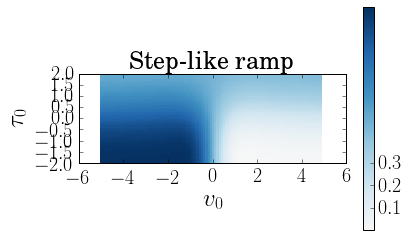

In [633]:
%%time
fig = plt.figure()
chstep17=chargeStepvec(v0v,tauv)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chstep17, cmap='RdBu',rasterized=True,norm=MidpointNormalize(midpoint=0.))
plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.1,0.2,0.3])
ax = fig.gca()
ax.set_aspect(8/8.0)
#plt.xticks([0,2])
#plt.yticks([])
#plt.ylim([-4,4])
#plt.xlim([0,pi])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$v_0$',fontsize=25)
plt.ylabel(r'$\tau_0$',fontsize=25)
#plt.savefig('charge_2d_lin.pdf',bbox_inches='tight',dpi=300)

In [634]:
np.savetxt('charge_step_17.txt', chstep17)

In [67]:
chstepLarge=np.loadtxt('charge_step_17.txt')

CPU times: user 2.78 s, sys: 1.65 s, total: 4.43 s
Wall time: 3.94 s


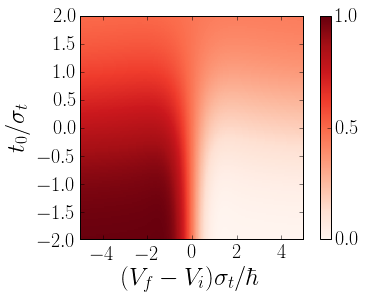

In [73]:
%%time
fig = plt.figure()
#chstepLarge=chargeStepvec(v0v,tauv)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chstepLarge, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(10/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-5,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_f-V_i)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_exact.pdf',bbox_inches='tight',dpi=300)

In [770]:
np.savetxt('charge_step_large', chstepLarge)

In [72]:
chstepLarge=np.loadtxt('charge_step_large')

## Semiclassical approximation for a step-like ramp

In [235]:
def Wstepapprox(tau,eps,v0,tau0):
    return exp(-2*(eps+v0*theta(tau-tau0)+k)**2-tau**2/2)/pi

Wstepapproxv=np.vectorize(Wstepapprox)

In [236]:
def IntStepapprox(tau,eps,v0,tau0):
    return Wstepapprox(tau,eps,v0,tau0)*T(eps)

IntStepApprvec=np.vectorize(IntStepapprox)

In [237]:
tau=np.arange(-5,5,0.01)
epscut=np.arange(0,17,0.1)

In [238]:
t, encut = np.meshgrid(tau,epscut)

In [239]:
def chargeStepappr(v0,tau0):
    Int=IntStepApprvec(t,encut,v0,tau0)
    return simps(simps(Int,t),epscut)

chargeStepApprvec=np.vectorize(chargeStepappr)

In [765]:
%%time
chargeStepappr(2,1)

CPU times: user 280 ms, sys: 0 ns, total: 280 ms
Wall time: 277 ms


0.39315771948199468

In [766]:
%%time
chargeStepappr(2,1)

CPU times: user 275 ms, sys: 16.2 ms, total: 291 ms
Wall time: 280 ms


0.39315771948199468

In [74]:
v0vec=np.arange(-5,5,0.025)
tau0vec=np.arange(-2,2,0.025)

In [75]:
v0v, tauv = np.meshgrid(v0vec,tau0vec)

CPU times: user 2.69 s, sys: 1.43 s, total: 4.12 s
Wall time: 3.39 s


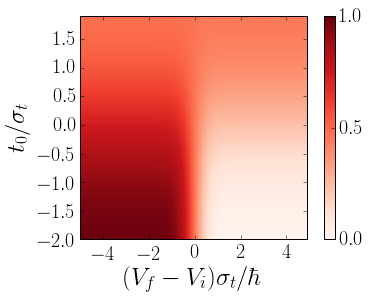

In [76]:
%%time
fig = plt.figure()
#chstepapprLarge=chargeStepApprvec(v0v,tauv)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chstepapprLarge, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(10/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,1.9])
plt.xlim([-5,4.9])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_f-V_i)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_approx.pdf',bbox_inches='tight',dpi=300)

In [779]:
np.savetxt('charge_step_appr.txt', chstepapprLarge)

In [66]:
chstepapprLarge=np.loadtxt('charge_step_appr.txt')

CPU times: user 2.76 s, sys: 1.45 s, total: 4.21 s
Wall time: 3.45 s


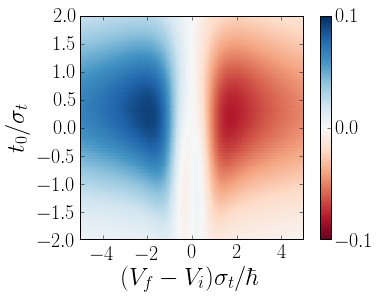

In [77]:
%%time
fig = plt.figure()
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chstepLarge-chstepapprLarge, cmap='RdBu',vmin=-0.1,vmax=0.1,rasterized=True,norm=MidpointNormalize(midpoint=0.))
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,-0.1,0.1])
ax = fig.gca()
ax.set_aspect(10/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-5,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_f-V_i)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_diff.pdf',bbox_inches='tight',dpi=300)

## Transmitted charge for a step-like ramp keeping the step fixed but varying its position

In [294]:
def Wstepk(tau,eps,k,tau0):
    return (eps<15)*(1.0/pi*theta(tau-tau0)*exp(-2.0*(eps+v0+k)**2-tau**2/2.0)*np.real(erf((tau-tau0+1j*2.0*(eps+v0+k))/sqrt(2.0)))\
            +1.0/pi*theta(tau0-tau)*exp(-2.0*(eps+k)**2-tau**2/2.0)*np.real(erf((tau0-tau+1j*2.0*(eps+k))/sqrt(2.0)))\
            +1.0/pi*np.real(exp(-1j*v0*(tau-tau0)-2.0*(eps+v0/2.0+k)**2-tau**2/2.0)*(1.0-erf((np.absolute(tau-tau0)+1j*2.0*(eps+v0/2.0+k))/sqrt(2.0)))))\
            +(eps>=15)*(1.0/pi*theta(tau-tau0)*exp(-2.0*(eps+v0+k)**2-tau**2/2.0)*np.real(erfapprox((tau-tau0+1j*2.0*(eps+v0+k))/sqrt(2.0)))\
            +1.0/pi*theta(tau0-tau)*exp(-2.0*(eps+k)**2-tau**2/2.0)*np.real(erfapprox((tau0-tau+1j*2.0*(eps+k))/sqrt(2.0)))\
            +1.0/pi*np.real(exp(-1j*v0*(tau-tau0)-2.0*(eps+v0/2.0+k)**2-tau**2/2.0)*(1.0-erfapprox((np.absolute(tau-tau0)+1j*2.0*(eps+v0/2.0+k))/sqrt(2.0)))))

Wstepkv=np.vectorize(Wstepk)

In [295]:
def IntStep(tau,eps,k,tau0):
    return Wstepk(tau,eps,k,tau0)*T(eps)

IntStepvec=np.vectorize(IntStep)

In [437]:
v0=3.0;
eps0=0;

In [372]:
tau=np.arange(-5,5,0.1)
epscut=np.arange(0,17,0.1)

In [373]:
t, encut = np.meshgrid(tau,epscut)

In [374]:
def chargeStep(k,tau0):
    Int=IntStepvec(t,encut,k,tau0)
    Int=np.nan_to_num(Int)
    return simps(simps(Int,t),epscut)

chargeStepvec=np.vectorize(chargeStep)

In [375]:
%%time
chargeStepvec(2,0)

CPU times: user 1.46 s, sys: 24.2 ms, total: 1.49 s
Wall time: 1.46 s


array(0.007220175106353021)

In [433]:
kvec=np.arange(-4.5,1.5,0.025)
tau0vec=np.arange(-3,3,0.025)

In [434]:
kv, tauv = np.meshgrid(kvec,tau0vec)

In [435]:
tau0vec.shape

(240,)

CPU times: user 945 ms, sys: 0 ns, total: 945 ms
Wall time: 961 ms


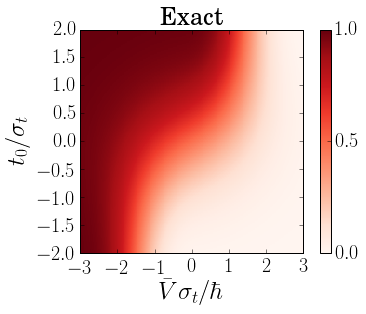

In [388]:
%%time
fig = plt.figure()
#chstepk5=chargeStepvec(kv,tauv)
np.savetxt('charge_step_vaver.txt',chstepk)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(kvec+v0/2.0, tau0vec, chstepk, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
#plt.plot(vbord,tau0vec,color='black')
plt.title(r'Exact',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
#plt.savefig('charge_step_vaver.pdf',bbox_inches='tight',dpi=300)

In [389]:
chstepk=np.loadtxt('charge_step_vaver.txt')

In [576]:
n=chstepk.shape[0]
border=np.zeros(n)
for i in range(0,n):
    arr=chstepk-0.5
    border[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbord=np.zeros(n)
for i in range(0,n):
    vbord[i]=border[i]/n*6.0-3.0

In [391]:
chstepk.shape

(240, 240)

### Slice at t0=0

CPU times: user 787 ms, sys: 776 ms, total: 1.56 s
Wall time: 1.85 s


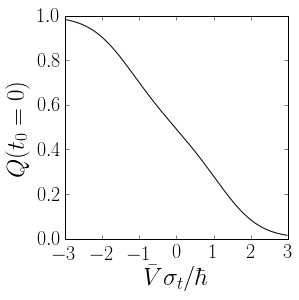

In [438]:
%%time
fig = plt.figure()
#chstepk5=chargeStepvec(kv,tauv)
plt.plot(kvec+v0/2.0,chstepk[120,:],color='black')
#plt.title(r'Exact',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
ax = fig.gca()
ax.set_aspect(6.0/1.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([0,1])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$Q(t_0=0)$',fontsize=25)
plt.savefig('Q_step_t00_v3.pdf',bbox_inches='tight',dpi=300)

## Delta V=5

In [449]:
kvec=np.arange(-6.5,1.5,0.025)
tau0vec=np.arange(-3,3,0.025)

In [450]:
kv, tauv = np.meshgrid(kvec,tau0vec)

In [451]:
v0=5.0;
eps0=0;

CPU times: user 3.18 s, sys: 1.56 s, total: 4.74 s
Wall time: 4.32 s


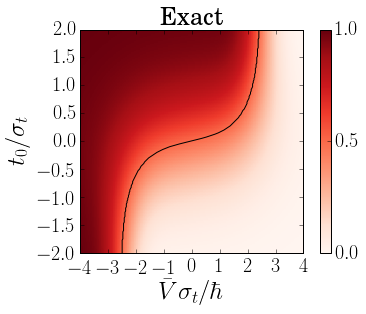

In [452]:
%%time
fig = plt.figure()
#chstepk5=chargeStepvec(kv,tauv)
np.savetxt('charge_step_vaver_v5.txt',chstepk5)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(kvec+v0/2.0, tau0vec, chstepk5, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
plt.plot(vbord,tau0vec,color='black')
plt.title(r'Exact',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(8.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-4,4])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_v5.pdf',bbox_inches='tight',dpi=300)

In [328]:
chstepk5=np.loadtxt('charge_step_vaver_v5.txt')

In [352]:
n=chstepk5.shape[0]
border=np.zeros(n)
for i in range(0,n):
    arr=chstepk5-0.5
    border[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbord=np.zeros(n)
for i in range(0,n):
    vbord[i]=border[i]/n*6.0-4.0

### Slice at t0=0

CPU times: user 849 ms, sys: 896 ms, total: 1.74 s
Wall time: 1.93 s


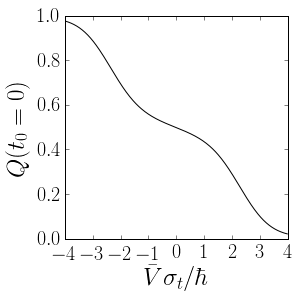

In [431]:
%%time
fig = plt.figure()
#chstepk5=chargeStepvec(kv,tauv)
plt.plot(kvec+v0/2.0,chstepk5[120,:],color='black')
#plt.title(r'Exact',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
ax = fig.gca()
ax.set_aspect(8.0/1.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([0,1])
plt.xlim([-4,4])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$Q(t_0=0)$',fontsize=25)
plt.savefig('Q_step_t00.pdf',bbox_inches='tight',dpi=300)

### Semiclassics V=5

In [305]:
def Wstepapproxk(tau,eps,k,tau0):
    return exp(-2*(eps+v0*theta(tau-tau0)+k)**2-tau**2/2)/pi

Wstepapproxkv=np.vectorize(Wstepapproxk)

In [306]:
def IntStepapprox(tau,eps,k,tau0):
    return Wstepapproxk(tau,eps,k,tau0)*T(eps)

IntStepapproxvec=np.vectorize(IntStepapprox)

In [439]:
v0=5.0;
eps0=0;

In [440]:
tau=np.arange(-5,5,0.025)
epscut=np.arange(0,17,0.1)

In [441]:
t, encut = np.meshgrid(tau,epscut)

In [442]:
def chargeStepapprox(k,tau0):
    Int=IntStepapproxvec(t,encut,k,tau0)
    Int=np.nan_to_num(Int)
    return simps(simps(Int,t),epscut)

chargeStepapproxvec=np.vectorize(chargeStepapprox)

In [446]:
kvec=np.arange(-6.5,1.5,0.025)
tau0vec=np.arange(-3,3,0.025)

In [447]:
kv, tauv = np.meshgrid(kvec,tau0vec)

CPU times: user 2.93 s, sys: 1.43 s, total: 4.36 s
Wall time: 3.53 s


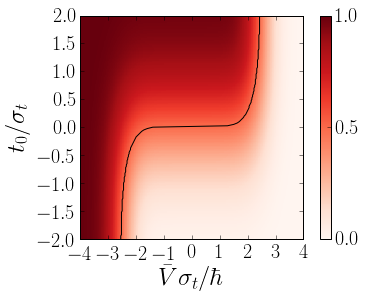

In [448]:
%%time
fig = plt.figure()
#chstepkapprox5=chargeStepapproxvec(kv,tauv)
np.savetxt('charge_step_vaver_approx_v5.txt', chstepkapprox5)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(kvec+v0/2.0, tau0vec, chstepkapprox5, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.plot(vbordappr,tau0vec,color='black')
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(8.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-4,4])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_approx_v5.pdf',bbox_inches='tight',dpi=300)

In [ ]:
chstepkapprox5=np.loadtxt('charge_step_appr_vaver_v5.txt')

In [346]:
n=chstepkapprox5.shape[0]
borderappr=np.zeros(n)
arr=chstepkapprox5-0.5
for i in range(0,n):
    borderappr[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbordappr=np.zeros(n)
for i in range(0,n):
    vbordappr[i]=borderappr[i]/n*6.0-4.0

### Slice at t0=0

CPU times: user 2.02 s, sys: 1 s, total: 3.02 s
Wall time: 3.16 s


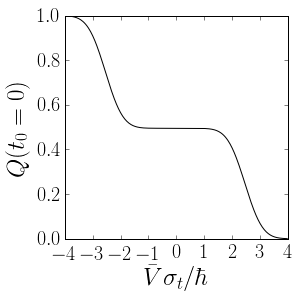

In [445]:
%%time
fig = plt.figure()
#chstepk5=chargeStepvec(kv,tauv)
plt.plot(kvec+v0/2.0,chstepkapprox5[120,:],color='black')
#plt.title(r'Exact',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
ax = fig.gca()
ax.set_aspect(8.0/1.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([0,1])
plt.xlim([-4,4])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$Q(t_0=0)$',fontsize=25)
plt.savefig('Q_step_semicl_t00.pdf',bbox_inches='tight',dpi=300)

### Derivative

In [943]:
chstepgrad=np.zeros((np.shape(chstepk)[0],np.shape(chstepk)[1]))
for i in range(0,np.shape(chstepk)[0]):
    chstepgrad[i,:] = np.gradient(chstepk[i,:])

CPU times: user 75.3 ms, sys: 3.89 ms, total: 79.2 ms
Wall time: 79.2 ms


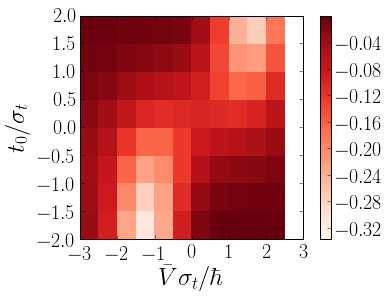

In [946]:
%%time
fig = plt.figure()
plt.pcolor(kvec+v0/2.0, tau0vec, chstepgrad, cmap='Reds')
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
#plt.savefig('charge_step_exact.pdf',bbox_inches='tight',dpi=300)

## Semiclassics: Transmitted charge for a step-like ramp keeping the step fixed but varying its position

In [1002]:
def Wstepapproxk(tau,eps,k,tau0):
    return exp(-2*(eps+v0*theta(tau-tau0)+k)**2-tau**2/2)/pi

Wstepapproxkv=np.vectorize(Wstepapproxk)

In [1001]:
def IntStepapprox(tau,eps,k,tau0):
    return Wstepapproxk(tau,eps,k,tau0)*T(eps)

IntStepapproxvec=np.vectorize(IntStepapprox)

In [287]:
v0=3.0;
eps0=0;

In [989]:
tau=np.arange(-5,5,0.025)
epscut=np.arange(0,17,0.1)

In [990]:
t, encut = np.meshgrid(tau,epscut)

In [1000]:
def chargeStepapprox(k,tau0):
    Int=IntStepapproxvec(t,encut,k,tau0)
    Int=np.nan_to_num(Int)
    return simps(simps(Int,t),epscut)

chargeStepapproxvec=np.vectorize(chargeStepapprox)

In [291]:
kvec=np.arange(-4.5,1.5,0.025)
tau0vec=np.arange(-3,3,0.025)

In [292]:
kv, tauv = np.meshgrid(kvec,tau0vec)

CPU times: user 1h 36min 53s, sys: 11.8 s, total: 1h 37min 4s
Wall time: 1h 36min 39s


/home/elinal/anaconda/lib/python2.7/site-packages/scipy/integrate/quadrature.py:392: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = x.reshape(tuple(shapex))


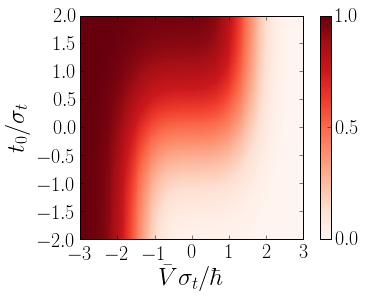

In [293]:
%%time
fig = plt.figure()
chstepkapprox=chargeStepapproxvec(kv,tauv)
np.savetxt('charge_step_vaver_approx.txt', chstepkapprox)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(kvec+v0/2.0, tau0vec, chstepkapprox, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_approx.pdf',bbox_inches='tight',dpi=300)

In [100]:
chstepkapprox=np.loadtxt('charge_step_appr_vaver.txt')

In [618]:
n=chstepkapprox.shape[0]
borderappr=np.zeros(n)
for i in range(0,n):
    arr=chstepkapprox-0.5
    borderappr[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbordappr=np.zeros(n)
for i in range(0,n):
    vbordappr[i]=borderappr[i]/n*6.0-3.0

CPU times: user 2.62 s, sys: 1.92 s, total: 4.54 s
Wall time: 4.42 s


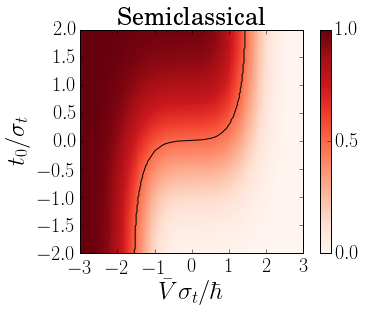

In [1051]:
%%time
fig = plt.figure()
plt.pcolor(kvec+v0/2.0, tau0vec, chstepkapprox, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
plt.plot(vbordappr,tau0vec,color='black')
plt.title(r'Semiclassical',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_approx.pdf',bbox_inches='tight',dpi=300)

### Comparison

CPU times: user 2.65 s, sys: 1.91 s, total: 4.56 s
Wall time: 4.45 s


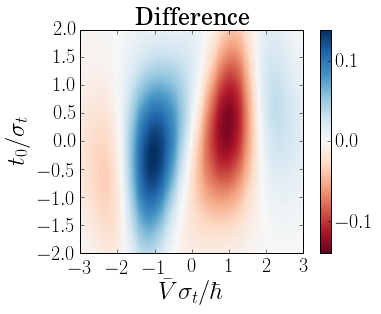

In [1052]:
%%time
fig = plt.figure()
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(kvec+v0/2.0, tau0vec, chstepk-chstepkapprox, cmap='RdBu',vmin=-0.14,vmax=0.14,rasterized=True,norm=MidpointNormalize(midpoint=0))
plt.title(r'Difference',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[-0.1,0,0.1])
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_diff.pdf',bbox_inches='tight',dpi=300)

In [296]:
np.min(chstepk-chstepkapprox)

-0.13186559745637938

### Derivative

In [982]:
chstepkapproxgrad=np.zeros((np.shape(chstepkapprox)[0],np.shape(chstepkapprox)[1]))
for i in range(0,np.shape(chstepkapprox)[0]):
    chstepkapproxgrad[i,:] = np.gradient(chstepkapprox[i,:])

CPU times: user 940 ms, sys: 7.93 ms, total: 948 ms
Wall time: 946 ms


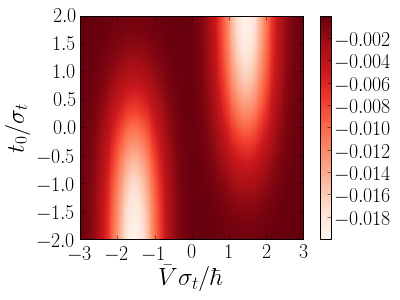

In [983]:
%%time
fig = plt.figure()
plt.pcolor(kvec+v0/2.0, tau0vec, chstepkapproxgrad, cmap='Reds')
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
#plt.savefig('charge_step_exact.pdf',bbox_inches='tight',dpi=300)

# Transmitted charge -- step-like ramp -- small step size

In [1004]:
v0=0.5;
eps0=0;

In [1006]:
tau=np.arange(-5,5,0.1)
epscut=np.arange(0,17,0.1)

In [1007]:
t, encut = np.meshgrid(tau,epscut)

In [1008]:
kvec=np.arange(-3.25,2.75,0.025)
tau0vec=np.arange(-3,3,0.025)

In [1009]:
kv, tauv = np.meshgrid(kvec,tau0vec)

CPU times: user 1.91 s, sys: 563 ms, total: 2.47 s
Wall time: 1.86 s


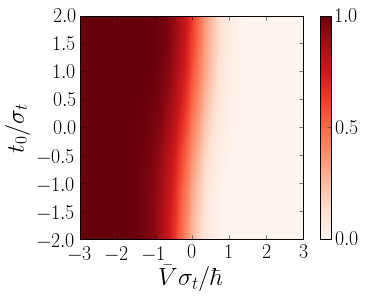

In [1018]:
%%time
fig = plt.figure()
#chstepk05=chargeStepvec(kv,tauv)
#np.savetxt('charge_step_vaver_05.txt',chstepk05)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(kvec+v0/2.0, tau0vec, chstepk05, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_05.png',bbox_inches='tight',dpi=300)

### Derivative

In [1012]:
chstepk05grad=np.zeros((np.shape(chstepk05)[0],np.shape(chstepk05)[1]))
for i in range(0,np.shape(chstepk05)[0]):
    chstepk05grad[i,:] = np.gradient(chstepk05[i,:])

CPU times: user 876 ms, sys: 12 ms, total: 888 ms
Wall time: 888 ms


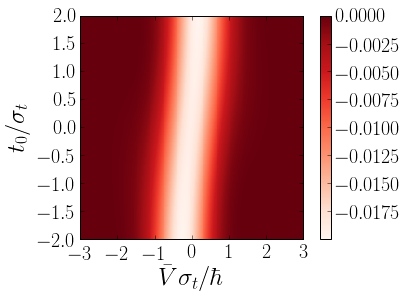

In [1013]:
%%time
fig = plt.figure()
plt.pcolor(kvec+v0/2.0, tau0vec, chstepk05grad, cmap='Reds')
plt.colorbar()
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
#plt.savefig('charge_step_exact.pdf',bbox_inches='tight',dpi=300)

In [1014]:
chstepk05gradt=np.zeros((np.shape(chstepk05)[0],np.shape(chstepk05)[1]))
for i in range(0,np.shape(chstepk05)[1]):
    chstepk05gradt[:,i] = np.gradient(chstepk05[:,i])

CPU times: user 2.34 s, sys: 1.01 s, total: 3.34 s
Wall time: 3.54 s


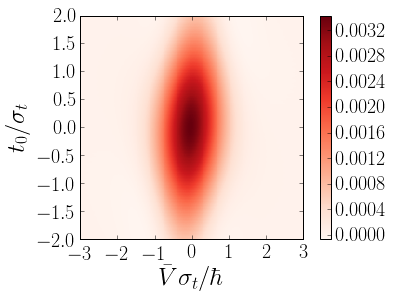

In [1019]:
%%time
fig = plt.figure()
plt.pcolor(kvec+v0/2.0, tau0vec, chstepk05gradt, cmap='Reds')
plt.colorbar()
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_05_tder.png',bbox_inches='tight',dpi=300)

In [1016]:
chstepk05gradte=np.zeros((np.shape(chstepk05gradt)[0],np.shape(chstepk05gradt)[1]))
for i in range(0,np.shape(chstepk05gradt)[0]):
    chstepk05gradte[i,:] = np.gradient(chstepk05gradt[i,:])

CPU times: user 847 ms, sys: 24 ms, total: 871 ms
Wall time: 870 ms


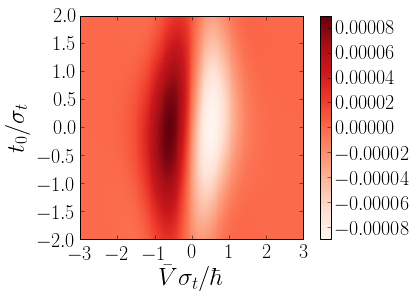

In [1017]:
%%time
fig = plt.figure()
plt.pcolor(kvec+v0/2.0, tau0vec, chstepk05gradte, cmap='Reds')
plt.colorbar()
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
#plt.savefig('charge_step_exact.pdf',bbox_inches='tight',dpi=300)

## Semiclassical

CPU times: user 23min 49s, sys: 2.88 s, total: 23min 52s
Wall time: 23min 48s


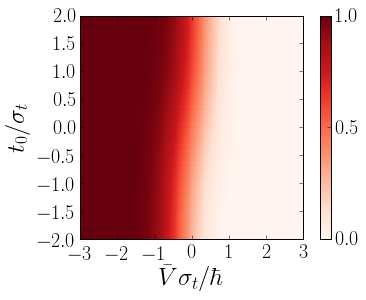

In [1011]:
%%time
fig = plt.figure()
chstepkapprox05=chargeStepapproxvec(kv,tauv)
np.savetxt('charge_step_vaver_approx_05.txt', chstepkapprox05)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(kvec+v0/2.0, tau0vec, chstepkapprox05, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
#plt.title(r'Step-like ramp',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(6.0/4.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-2,2])
plt.xlim([-3,3])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$\bar{V}\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_step_vaver_approx_05.pdf',bbox_inches='tight',dpi=300)

# Transmitted charge -- parabolic ramp

In [890]:
def Wpar(tau,eps,v0,tau0): #with w->1/2w
    return sqrt(2.0)/(np.absolute(w)**(1.0/3.0)*sqrt(pi))*exp(-tau**2/2)*exp(1.0/(48.0*(0.5*w)**2)-(eps+k+v0-0.5*w*(tau-tau0)**2)/w)\
            *airy(-2.0*(eps+k+v0-1.0/8.0/w-0.5*w*(tau-tau0)**2)/w**(1.0/3.0))[0]

Wparv=np.vectorize(Wpar)

In [891]:
def IntPar(tau,eps,v0,tau0):
    return Wpar(tau,eps,v0,tau0)*T(eps)

IntParvec=np.vectorize(IntPar)

In [892]:
k=0;
eps0=0;

In [893]:
tau=np.arange(-7,7,0.1)
epscut=np.arange(0,8,0.1)

In [894]:
t, encut = np.meshgrid(tau,epscut)

In [895]:
def chargePar(v0,tau0):
    Int=IntParvec(t,encut,v0,tau0)
    Int=np.nan_to_num(Int)
    return simps(simps(Int,t),epscut)

chargeParvec=np.vectorize(chargePar)

In [896]:
v0vec=np.arange(-2,5,0.025)
tau0vec=np.arange(-5,5,0.025)

In [897]:
v0v, tauv = np.meshgrid(v0vec,tau0vec)

### w=0.2

In [898]:
w=0.2;

CPU times: user 3.84 s, sys: 1.8 s, total: 5.64 s
Wall time: 5.41 s


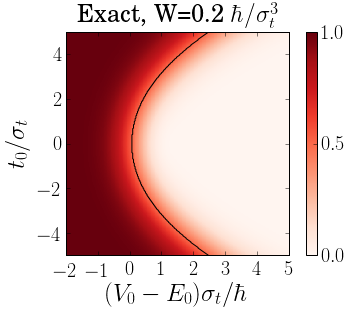

In [900]:
%%time
fig = plt.figure()
#chpar02=chargeParvec(v0v,tauv)
#np.savetxt('charge_par_02_corr.txt',chpar02)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chpar02, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
plt.plot(vbord02,tau0vec,color='black')
#plt.plot(parvec(tau0vec),tau0vec,color='black')
plt.title(r'Exact, W=0.2 $\hbar/\sigma_t^3$',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(7.0/10.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-5,5])
plt.xlim([-2,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_0-E_0)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_par_exact_02.pdf',bbox_inches='tight',dpi=300)

In [410]:
chpar02=np.loadtxt('charge_par_02.txt')

In [899]:
n=chpar02.shape[0]
border02=np.zeros(n)
for i in range(0,n):
    arr=chpar02-0.5
    border02[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbord02=np.zeros(n)
for i in range(0,n):
    vbord02[i]=border02[i]/280*7.0-2.0

### w=2

In [901]:
w=2.0;

In [902]:
tau=np.arange(-7,7,0.1)
epscut=np.arange(0,50,0.5)

In [903]:
t, encut = np.meshgrid(tau,epscut)

In [904]:
v0vec=np.arange(-2,5,0.025)
tau0vec=np.arange(-4,4,0.025)

In [905]:
v0v, tauv = np.meshgrid(v0vec,tau0vec)

CPU times: user 3.43 s, sys: 1.78 s, total: 5.21 s
Wall time: 4.96 s


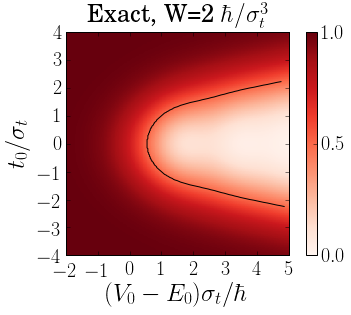

In [910]:
%%time
fig = plt.figure()
#chpar2=chargeParvec(v0v,tauv)
#np.savetxt('charge_par_2_corr.txt',chpar2)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chpar2, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
plt.title(r'Exact, W=2 $\hbar/\sigma_t^3$',fontsize=24)
#plt.plot(vb2,t2,color='black')
plt.plot(vb2,t2,color='black')
#plt.plot(parvec(tau0vec),tau0vec,color='black')
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(7.0/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-4,4])
plt.xlim([-2,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_0-E_0)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_par_exact_2.pdf',bbox_inches='tight',dpi=300)

In [906]:
def par(tau0):
    return 0.5*w*tau0**2

parvec=np.vectorize(par)

In [907]:
n=chpar2.shape[0]
nlim=70
border2=np.zeros(n)
for i in range(nlim,n-nlim):
    arr=chpar2-0.5
    border2[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbord2=np.zeros(n)
for i in range(0,n):
    vbord2[i]=border2[i]/280*7.0-2.0

In [908]:
vb2=vbord2[70:]
vb2=vb2[::-1]
vb2=vb2[70:]
vb2=vb2[::-1]

In [909]:
t2=tau0vec[70:]
t2=t2[::-1]
t2=t2[70:]
t2=t2[::-1]

## Semiclassics

In [1089]:
def Wparapprox2nd(tau,eps,v0,tau0): #with w->1/2w
    return exp(-2*(eps+v0-0.5*w*(tau-tau0)**2+k)**2-tau**2/2.0)/pi\
            - 1.0/24.0*(-w)/pi*(16.0*exp(-(tau**2/2.0)-2.0*(eps+k+v0-0.5*(tau-tau0)**2*w)**2)*(eps+k+v0-0.5*(tau-tau0)**2*w)*(3.0-4.0*(eps+k+v0-0.5*(tau-tau0)**2*w)**2))
    
Wparapprox2ndv=np.vectorize(Wparapprox2nd)

In [1090]:
def IntParapprox(tau,eps,v0,tau0):
    return Wparapprox2nd(tau,eps,v0,tau0)*T(eps)

IntParapproxvec=np.vectorize(IntParapprox)

In [1091]:
k=0;
eps0=0;

In [1092]:
tau=np.arange(-7,7,0.1)
epscut=np.arange(0,8,0.1)

In [1093]:
t, encut = np.meshgrid(tau,epscut)

In [1094]:
def chargeParapprox(v0,tau0):
    Int=IntParapproxvec(t,encut,v0,tau0)
    Int=np.nan_to_num(Int)
    return simps(simps(Int,t),epscut)

chargeParapproxvec=np.vectorize(chargeParapprox)

In [1095]:
v0vec=np.arange(-2,5,0.025)
tau0vec=np.arange(-5,5,0.025)

In [1096]:
v0v, tauv = np.meshgrid(v0vec,tau0vec)

### w=0.2

In [1097]:
w=0.2;

CPU times: user 3.86 s, sys: 2.07 s, total: 5.94 s
Wall time: 6.09 s


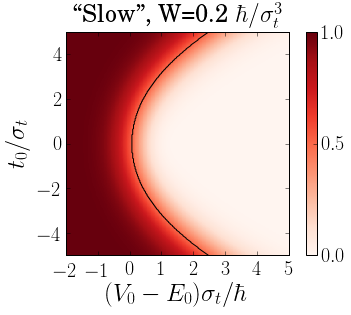

In [1078]:
%%time
fig = plt.figure()
#chparappr02=chargeParapproxvec(v0v,tauv)
#np.savetxt('charge_par_appr_02_corr.txt',chparappr02)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chparappr02, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
plt.title(r'``Slow", W=0.2 $\hbar/\sigma_t^3$',fontsize=24)
plt.plot(vbordappr02,tau0vec,color='black')
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(7.0/10.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-5,5])
plt.xlim([-2,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_0-E_0)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_par_appr_02.pdf',bbox_inches='tight',dpi=300)

In [428]:
chparappr02=np.loadtxt('charge_par_appr_02.txt')

In [920]:
n=chparappr02.shape[0]
nlim=0
borderappr02=np.zeros(n)
for i in range(nlim,n-nlim):
    arr=chparappr02-0.5
    borderappr02[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbordappr02=np.zeros(n)
for i in range(0,n):
    vbordappr02[i]=borderappr02[i]/280*7.0-2.0

### Comparison witht the exact result

CPU times: user 3.65 s, sys: 1.82 s, total: 5.47 s
Wall time: 5.13 s


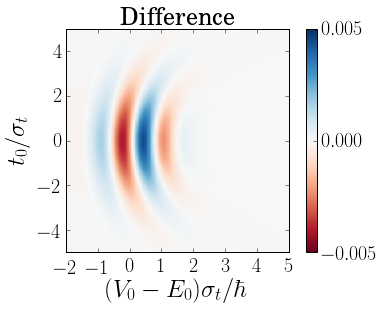

In [1099]:
%%time
fig = plt.figure()
plt.pcolor(v0vec, tau0vec, chpar02-chparappr02, cmap='RdBu',vmin=-0.005,vmax=0.005,rasterized=True,norm=MidpointNormalize(midpoint=0))
plt.title(r'Difference',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[-0.005,0,0.005])
ax = fig.gca()
ax.set_aspect(7.0/10.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-5,5])
plt.xlim([-2,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_0-E_0)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_par_02_diff.pdf',bbox_inches='tight',dpi=300)

In [489]:
np.min(chpar02-chparappr02)

-0.0040216294403124797

### w=2

In [1080]:
w=2.0;

In [1081]:
tau=np.arange(-7,7,0.1)
epscut=np.arange(0,50,0.5)

In [1082]:
t, encut = np.meshgrid(tau,epscut)

In [1083]:
v0vec=np.arange(-2,5,0.025)
tau0vec=np.arange(-4,4,0.025)

In [1084]:
v0v, tauv = np.meshgrid(v0vec,tau0vec)

CPU times: user 3.55 s, sys: 1.98 s, total: 5.54 s
Wall time: 5.68 s


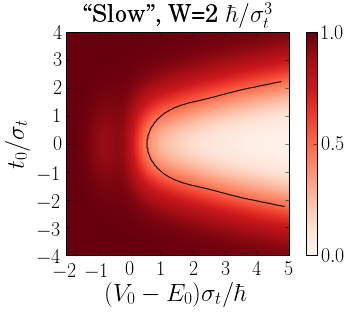

In [1085]:
%%time
fig = plt.figure()
#chparappr2=chargeParapproxvec(v0v,tauv)
#np.savetxt('charge_step_appr_2_appr.txt',chparappr2)
#plt.pcolor(t, en, W, cmap='RdBu')
plt.pcolor(v0vec, tau0vec, chparappr2, cmap='Reds',vmin=0,vmax=1,rasterized=True,norm=MidpointNormalize(midpoint=0.5))
plt.title(r'``Slow", W=2 $\hbar/\sigma_t^3$',fontsize=24)
plt.plot(vb2,t2,color='black')
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[0,0.5,1])
ax = fig.gca()
ax.set_aspect(7.0/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-4,4])
plt.xlim([-2,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_0-E_0)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_par_appr_2.pdf',bbox_inches='tight',dpi=300)

In [212]:
chparappr2=np.loadtxt('charge_step_appr_2.txt')

In [927]:
n=chparappr2.shape[0]
nlim=70
borderappr2=np.zeros(n)
for i in range(nlim,n-nlim):
    arr=chparappr2-0.5
    borderappr2[i] = np.where(np.diff(np.sign(arr[i])))[0]
    
vbordappr2=np.zeros(n)
for i in range(0,n):
    vbordappr2[i]=borderappr2[i]/280*7.0-2.0

In [928]:
vb2=vbord2[70:]
vb2=vb2[::-1]
vb2=vb2[70:]
vb2=vb2[::-1]

In [929]:
t2=tau0vec[70:]
t2=t2[::-1]
t2=t2[70:]
t2=t2[::-1]

### Comparison with the exact result

CPU times: user 3.21 s, sys: 1.82 s, total: 5.03 s
Wall time: 4.66 s


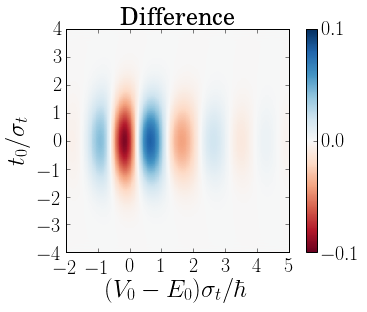

In [1087]:
%%time
fig = plt.figure()
plt.pcolor(v0vec, tau0vec, chpar2-chparappr2, cmap='RdBu',vmin=-0.1,vmax=0.1,rasterized=True,norm=MidpointNormalize(midpoint=0))
plt.title(r'Difference',fontsize=24)
# set the limits of the plot to the limits of the data
#plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(ticks=[-0.1,0,0.1])
ax = fig.gca()
ax.set_aspect(7.0/8.0)
#plt.xticks([0,2])
#plt.yticks([])
plt.ylim([-4,4])
plt.xlim([-2,5])
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#ax.axis('off')
plt.xlabel(r'$(V_0-E_0)\sigma_t/\hbar$',fontsize=25)
plt.ylabel(r'$t_0/\sigma_t$',fontsize=25)
plt.savefig('charge_par_2_diff.pdf',bbox_inches='tight',dpi=300)

In [485]:
np.min(chpar2-chparappr2)

-0.093079123081952098